# 1. Report result on physicians' assessment of explanation quality

XAI quality is the physicians' assessment of how closely the AI explanation matches with clinical judgment. I.e.: plausibility assessment

In [2]:
from base_code import *

valid_data = pd.read_csv('../neurosurgeon35_data/neurosurgeon35.csv', index_col='Respondent ID')
xai25 = pd.read_csv('../computational_data/xai25.csv')
mriwise = pd.read_csv('../computational_data/mri_wise_acc.csv')
dr_wise_acc = pd.read_csv('../computational_data/dr_wise_acc.csv')
result_long = pd.read_csv('../computational_data/result_long.csv')

In [4]:
xai_qual = valid_data.filter(regex='How closely does the highlighted area of the color map match with your clinical judgment?').fillna(np.nan).astype(float)
xai_qual_values = xai_qual.stack().dropna()
print('The average explanation quality rating is: ', '{:.2f}$\pm${:.2f}'.format(np.mean(xai_qual_values), np.std(xai_qual_values)))

The average explanation quality rating is:  6.12$\pm$2.92


In [5]:
# report variation of explanation quality
var = np.std(xai_qual).to_list()
min(var), max(var)

(2.390722810272148, 3.0384572108591925)

# 2. Report result on physicians' choice on "Need explanation"

Need explanation is: 

For each MRI case, the physician choose "yes/no" for the question: 
    
"Would you like to check the explanation from AI for this MRI?"

In [7]:
will_check_xai =  valid_data.filter(regex='button in the AI system').replace({"Yes":1, "No":0})
gt_long = xai25[['dataID','gt','pred']]

will_check_xai_t = will_check_xai.rename(columns = {c: gt_long['dataID'].iloc[i] for i, c in enumerate(will_check_xai.columns)}).transpose().reset_index(level=0).rename(columns={'index':'dataID'})
need_xai_rate_drwise = dict()
for idx in will_check_xai.index:
    row_lst = will_check_xai.loc[idx].dropna().to_list()
    need_xai_rate_drwise[idx] = sum(row_lst) /len(row_lst)
sorted_need_xai_drwise = dict(sorted(need_xai_rate_drwise.items(), key=lambda item: item[1])) 
sorted_need_xai_drwise

{11: 0.0,
 18: 0.0,
 30: 0.0,
 32: 0.0,
 34: 0.0,
 5: 0.08695652173913043,
 6: 0.12,
 20: 0.12,
 17: 0.125,
 13: 0.13043478260869565,
 3: 0.16,
 15: 0.16,
 24: 0.16,
 16: 0.16666666666666666,
 25: 0.17647058823529413,
 10: 0.2,
 26: 0.2,
 31: 0.2,
 14: 0.24,
 27: 0.24,
 9: 0.25,
 33: 0.25,
 8: 0.28,
 1: 0.3333333333333333,
 19: 0.48,
 35: 0.5,
 29: 0.6666666666666666,
 28: 0.68,
 22: 0.88,
 7: 0.96,
 12: 0.96,
 23: 0.96,
 2: 1.0,
 4: 1.0,
 21: 1.0}

(array([6., 9., 8., 1., 1., 1., 2., 0., 1., 6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

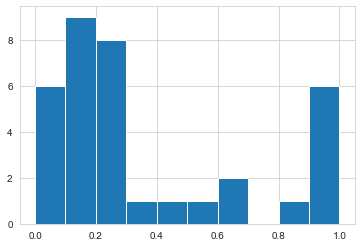

In [8]:
# visualize the distribution of the rate of "need explanation"
plt.hist(need_xai_rate_drwise.values(), bins = 10)
# plt.savefig("../reporting/need_xai_hist.pdf", transparent=True, bbox_inches = 'tight')


## 2.1 correlation between need explanation and decision agreement


In [3]:
result_error = pd.read_csv('../computational_data/result_error.csv')
subset = result_error[['Agreement_bl', 'will_check_xai']].dropna()
expected, observed, stats = pg.chi2_independence(subset, x='Agreement_bl', y='will_check_xai')

In [4]:
expected

will_check_xai,0.0,1.0
Agreement_bl,,
Agree,395.44504,211.55496
Disagree,90.55496,48.44504


In [5]:
observed

will_check_xai,0.0,1.0
Agreement_bl,,
Agree,436.5,170.5
Disagree,49.5,89.5


In [6]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,65.634871,1.0,5.426998e-16,0.296618,1.0
1,cressie-read,0.666667,64.288755,1.0,1.074573e-15,0.293561,1.0
2,log-likelihood,0.000000,62.738655,1.0,2.360373e-15,0.290000,1.0
3,freeman-tukey,-0.500000,62.517190,1.0,2.641291e-15,0.289488,1.0
4,mod-log-likelihood,-1.000000,63.079937,1.0,1.984855e-15,0.290788,1.0
5,neyman,-2.000000,66.630320,1.0,3.275098e-16,0.298859,1.0


In [7]:
subset

,Agreement_bl,will_check_xai
0,Agree,0.0
1,Agree,0.0
2,Agree,1.0
4,Agree,0.0
5,Agree,1.0
...,...,...
754,Agree,1.0
755,Agree,0.0
756,Agree,1.0
757,Agree,0.0
